# Sprint 自然言語処理入門

In [40]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [2]:
from collections import Counter

import pandas as pd

# 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください

In [3]:
data = ["This movie is SOOOO funny!!!", "What a movie! I never", "best movie ever!!!!! this movie" ]

## 1-gram

In [4]:
data_word_sentence = []
splited_word = []
for d in data:
    a = d.split()
    data_word_sentence.append(a)
    for i in a:
        splited_word.append(i)

In [5]:
splited_word = list(set(splited_word))

In [6]:
data_word_sentence

[['This', 'movie', 'is', 'SOOOO', 'funny!!!'],
 ['What', 'a', 'movie!', 'I', 'never'],
 ['best', 'movie', 'ever!!!!!', 'this', 'movie']]

In [7]:
splited_word

['ever!!!!!',
 'movie',
 'What',
 'is',
 'a',
 'never',
 'best',
 'this',
 'movie!',
 'I',
 'SOOOO',
 'This',
 'funny!!!']

In [8]:
result_dict1 = {}
for i in splited_word:
    one_list = []
    for j in data_word_sentence:
        one_list.append(j.count(i))
        result_dict1[i] = one_list

In [9]:
result_dict1

{'ever!!!!!': [0, 0, 1],
 'movie': [1, 0, 2],
 'What': [0, 1, 0],
 'is': [1, 0, 0],
 'a': [0, 1, 0],
 'never': [0, 1, 0],
 'best': [0, 0, 1],
 'this': [0, 0, 1],
 'movie!': [0, 1, 0],
 'I': [0, 1, 0],
 'SOOOO': [1, 0, 0],
 'This': [1, 0, 0],
 'funny!!!': [1, 0, 0]}

In [10]:
result_df = pd.DataFrame(result_dict1, index=data)

In [11]:
result_df

,ever!!!!!,movie,What,is,a,never,best,this,movie!,I,SOOOO,This,funny!!!
This movie is SOOOO funny!!!,0,1,0,1,0,0,0,0,0,0,1,1,1
What a movie! I never,0,0,1,0,1,1,0,0,1,1,0,0,0
best movie ever!!!!! this movie,1,2,0,0,0,0,1,1,0,0,0,0,0


In [12]:
# 2-gram

In [13]:
split_word_2gram = []
word_sentence_2gram = []
for l in data_word_sentence:
    wow = []
    for idx in range(len(l) -2 +1):
        ab = l[idx:idx + 2]
        d = ab[0] +" " + ab[1]
        split_word_2gram.append(d)
        wow.append(d)
    
    word_sentence_2gram.append(wow)

In [14]:
word_sentence_2gram

[['This movie', 'movie is', 'is SOOOO', 'SOOOO funny!!!'],
 ['What a', 'a movie!', 'movie! I', 'I never'],
 ['best movie', 'movie ever!!!!!', 'ever!!!!! this', 'this movie']]

In [15]:
split_word_2gram

['This movie',
 'movie is',
 'is SOOOO',
 'SOOOO funny!!!',
 'What a',
 'a movie!',
 'movie! I',
 'I never',
 'best movie',
 'movie ever!!!!!',
 'ever!!!!! this',
 'this movie']

In [16]:
result_dict2 = {}
for i in split_word_2gram:
    one_list2 = []
    for j in word_sentence_2gram:
        one_list2.append(j.count(i))
        result_dict2[i] = one_list2

In [17]:
result_dict2

{'This movie': [1, 0, 0],
 'movie is': [1, 0, 0],
 'is SOOOO': [1, 0, 0],
 'SOOOO funny!!!': [1, 0, 0],
 'What a': [0, 1, 0],
 'a movie!': [0, 1, 0],
 'movie! I': [0, 1, 0],
 'I never': [0, 1, 0],
 'best movie': [0, 0, 1],
 'movie ever!!!!!': [0, 0, 1],
 'ever!!!!! this': [0, 0, 1],
 'this movie': [0, 0, 1]}

In [18]:
result_df2 = pd.DataFrame(result_dict2, index=data)

In [19]:
result_df2

,This movie,movie is,is SOOOO,SOOOO funny!!!,What a,a movie!,movie! I,I never,best movie,movie ever!!!!!,ever!!!!! this,this movie
This movie is SOOOO funny!!!,1,1,1,1,0,0,0,0,0,0,0,0
What a movie! I never,0,0,0,0,1,1,1,1,0,0,0,0
best movie ever!!!!! this movie,0,0,0,0,0,0,0,0,1,1,1,1


# 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。
TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。

In [20]:
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/morishuuya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 5000)

x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.fit_transform(x_test)

print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

(25000, 5000)
(25000, 5000)


In [43]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 5000, ngram_range=(2,2))

x_train_tfidf_2gram = vectorizer.fit_transform(x_train)
x_test_tfidf_2gram = vectorizer.fit_transform(x_test)

print(x_train_tfidf_2gram.shape)
print(x_test_tfidf_2gram.shape)

(25000, 5000)
(25000, 5000)


In [45]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 1000, ngram_range=(2,2))

x_train_tfidf_1000 = vectorizer.fit_transform(x_train)
x_test_tfidf_1000 = vectorizer.fit_transform(x_test)

print(x_train_tfidf_1000.shape)
print(x_test_tfidf_1000.shape)

(25000, 1000)
(25000, 1000)


# 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。
ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [46]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lgrg = LogisticRegression()

In [47]:
lgrg.fit(x_train_tfidf, y_train)

y_pred = lgrg.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred))

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.55672


In [48]:
lgrg.fit(x_train_tfidf_2gram, y_train)

y_pred = lgrg.predict(x_test_tfidf_2gram)
print(accuracy_score(y_test, y_pred))

0.56448


In [49]:
lgrg.fit(x_train_tfidf_1000, y_train)

y_pred = lgrg.predict(x_test_tfidf_1000)
print(accuracy_score(y_test, y_pred))

0.56576


# 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。  
This movie is SOOOO funny!!!  
What a movie! I never  
best movie ever!!!!! this movie 

In [25]:
# normal
tfidf_array = np.zeros((3, 13))
for j in range(3):
    for i in range(13):
        n = result_df.iat[j, i]
        s = result_df.sum(axis=1)[j]
        N = result_df.shape[0]
        d = (result_df.iloc[:,i] >= 1).sum()
        
        tf = n / s
        idf = np.log(N / d)
        
        tf_idf = tf * idf
        tfidf_array[j ,i] = tf_idf

In [26]:
tfidf_array

array([[0.        , 0.08109302, 0.        , 0.21972246, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.21972246, 0.21972246, 0.21972246],
       [0.        , 0.        , 0.21972246, 0.        , 0.21972246,
        0.21972246, 0.        , 0.        , 0.21972246, 0.21972246,
        0.        , 0.        , 0.        ],
       [0.21972246, 0.16218604, 0.        , 0.        , 0.        ,
        0.        , 0.21972246, 0.21972246, 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [27]:
#sklearn
tfidf_sk_arr = np.zeros((3, 13))
for j in range(3):
    for i in range(13):
        n = result_df.iat[j, i]
        s = result_df.sum(axis=1)[j]
        N = result_df.shape[0]
        d = (result_df.iloc[:,i] >= 1).sum()
        
        tf = n 
        idf = np.log((1 + N) / (1 +  d)) + 1
        
        tf_idf = tf * idf
        tfidf_sk_arr[j ,i] = tf_idf

In [28]:
tfidf_sk_arr

array([[0.        , 1.28768207, 0.        , 1.69314718, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.69314718, 1.69314718, 1.69314718],
       [0.        , 0.        , 1.69314718, 0.        , 1.69314718,
        1.69314718, 0.        , 0.        , 1.69314718, 1.69314718,
        0.        , 0.        , 0.        ],
       [1.69314718, 2.57536414, 0.        , 0.        , 0.        ,
        0.        , 1.69314718, 1.69314718, 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [29]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

print("語彙の一覧 : {}".format(model.wv.vocab.keys()))

for vocab in model.wv.vocab.keys():
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.0082302   0.02408049  0.03856738  0.03244873  0.03135805  0.03467129
 -0.02705073  0.00499627  0.03091267 -0.04548453]
movieのベクトル : 
[ 0.04145413  0.03885274  0.03308154 -0.04712112 -0.0098867   0.03372115
 -0.03454908  0.02594179  0.00662227 -0.02679704]
isのベクトル : 
[ 0.03406468 -0.00492987  0.03458171 -0.01776264 -0.03222978 -0.013404
  0.03543762  0.02811564 -0.0360048  -0.02668507]
veryのベクトル : 
[-0.02968424 -0.01522698 -0.01072035  0.01340295 -0.01623585 -0.03185401
 -0.02299884  0.02275814  0.01447068 -0.04376133]
goodのベクトル : 
[ 0.01515114 -0.00278226  0.02906049 -0.04896694  0.04901393  0.04116394
  0.02269715 -0.04006554 -0.03310281 -0.04751993]
filmのベクトル : 
[-0.03428271 -0.03327842 -0.01789581 -0.00411011  0.04424705 -0.02275743
  0.00906097 -0.04885813 -0.0030917  -0.01173164]
aのベクトル : 
[-0.04007009 -0.03319386 -0.02490124  0.04479393  0.03016923  0.03466148
  0.04884226  0.0185284  

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


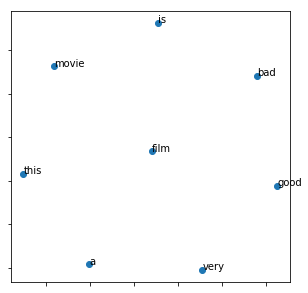

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [32]:
import re

In [33]:
coupus = []
for i in range(len(x_train)):
    x_train[i] = x_train[i].lower()
    x_train[i] = x_train[i].replace("!", "").strip()
    x_train[i] = x_train[i].replace("?", "").strip()
    x_train[i] = x_train[i].replace("<br />", "").strip()
    x_train[i] = re.sub(r"https?://[\w/:%#\$&\?\(\)~\.=\+\-]+", "", x_train[i])
    x_train[i] = x_train[i].split()

# 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [34]:
from gensim.models import Word2Vec
sentences = x_train
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


(22228092, 28707255)

# 【問題7】ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。

In [35]:
model.wv.most_similar(positive="good", topn=3)

[('terrible', 0.9663302302360535),
 ('bad', 0.953368604183197),
 ('horrible', 0.9522203207015991)]

In [36]:
model.wv.most_similar(positive="like", topn=3)

[('documentarian.', 0.9650168418884277),
 ('overlook:', 0.9612120985984802),
 ('futilely', 0.9404004812240601)]

In [37]:
model.wv.most_similar(positive="by", topn=3)

[('on.one', 0.9569797515869141),
 ('other.and', 0.9515284299850464),
 ('get",', 0.9365780353546143)]

In [1]:
"""
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=250, random_state=23, verbose=1)

vectors_tsne = tsne_model.fit_transform(model[vocabs])


fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()
"""

'\nfrom sklearn.manifold import TSNE\nimport matplotlib.pyplot as plt\n\nvocabs = model.wv.vocab.keys()\n\ntsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=250, random_state=23, verbose=1)\n\nvectors_tsne = tsne_model.fit_transform(model[vocabs])\n\n\nfig, ax = plt.subplots(figsize=(5,5))\nax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])\nfor i, word in enumerate(list(vocabs)):\n    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))\nax.set_yticklabels([])\nax.set_xticklabels([])\nplt.show()\n'

処理に時間がかかるため、可視化はやりませんでした。（遠藤さんに了承済み）